<a href="https://colab.research.google.com/github/udghosh/Mengary_Revenue_Prediction/blob/main/Mengary_Revenue_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Essential Libraries And Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df.set_index("id",inplace=True)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 1 to 6700
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 837.5+ KB


In [ ]:
df.isna().sum()

departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df['departure city'].value_counts()

New York City        610
Los Angeles          538
Philadelphia         355
San Francisco        319
Houston              273
                    ... 
Murrieta               1
Frisco                 1
Arlington Heights      1
Littleton              1
Antioch                1
Name: departure city, Length: 469, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


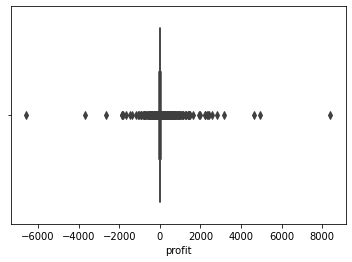

In [ ]:
sns.boxplot(df['profit'])

In [ ]:
df=df[df['profit']<1500]


In [ ]:
df=df[df['profit']>-1000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


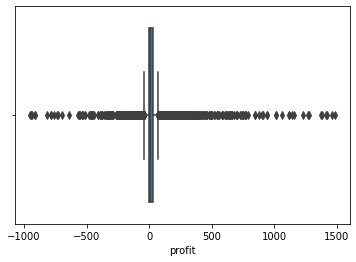

In [ ]:
sns.boxplot(df['profit'])


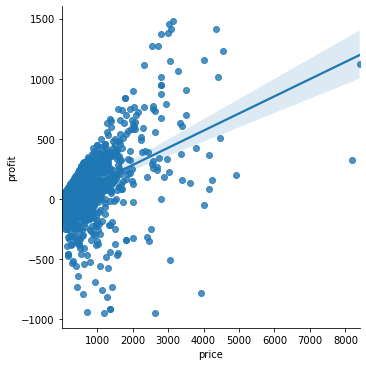

In [ ]:
sns.lmplot(x='price',y='profit',data=df)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df['discount'].unique().tolist()

[0.2, 0.0, 0.1, 0.7, 0.15, 0.8, 0.6, 0.4, 0.5, 0.3, 0.32, 0.45]

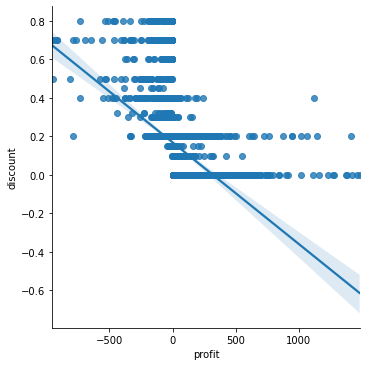

In [ ]:
sns.lmplot(y='discount',x='profit',data=df)


In [ ]:
# dis={0.00:12,0.20:11,0.1:10,0.15:9,0.3:8,0.32:7,0.4:6,0.5:5,0.45:4,0.6:3,0.7:2,0.8:1}
# df['dis_map']=df['discount'].map(dis)

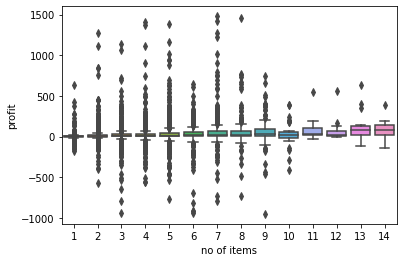

In [ ]:
sns.boxplot(x='no of items',y='profit',data=df)

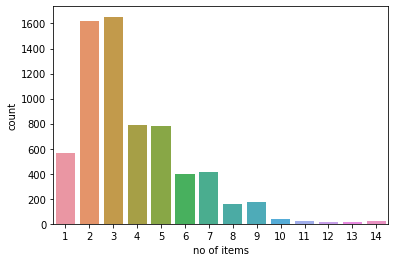

In [ ]:
sns.countplot(x='no of items',data=df)


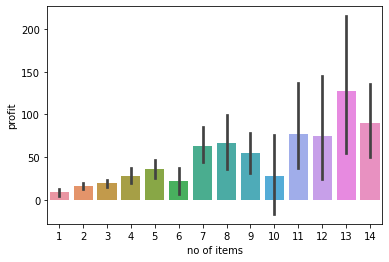

In [ ]:
sns.barplot(x='no of items',y='profit',data=df)

In [ ]:
# items={7:14,5:13,4:12,2:11,3:10,1:9,6:8,8:7,9:6,10:5,13:4,12:3,11:2,14:1}
items={13:14,14:13,12:12,11:11,8:10,7:9,9:8,5:7,4:6,6:5,10:4,3:3,2:2,1:1}
df['item_map']=df['no of items'].map(items)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map
id,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2


In [ ]:
df.location.value_counts()

West       2117
East       1920
Central    1542
South      1095
Name: location, dtype: int64

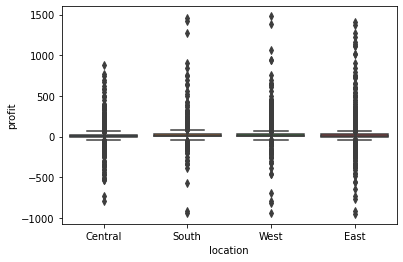

In [ ]:
sns.boxplot(x='location',y='profit',data=df)


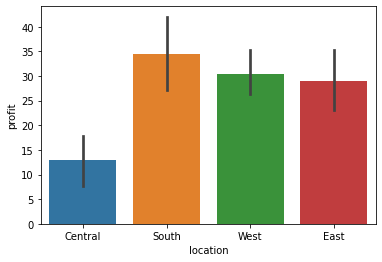

In [ ]:
sns.barplot(x='location',y='profit',data=df)


In [ ]:
# loc={'East':4,'South':3,'West':2,'Central':1}
loc={'East':1,'South':3,'West':2,'Central':4}
df['loc_map']=df['location'].map(loc)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map
id,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4


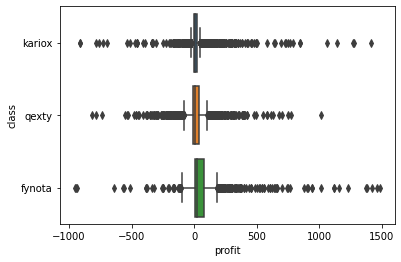

In [ ]:
sns.boxplot(y='class',x='profit',data=df)

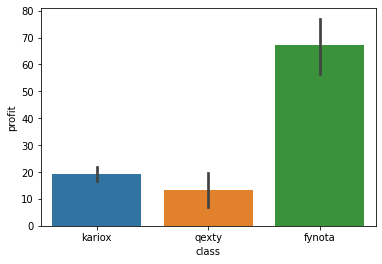

In [ ]:
sns.barplot(x='class',y='profit',data=df)

In [ ]:
class_map={'fynota':3,'kariox':2, 'qexty':1}
df['class_map']=df['class'].map(class_map)

In [ ]:
df.segment.value_counts()

Consumer       3507
Corporate      2043
Home Office    1124
Name: segment, dtype: int64

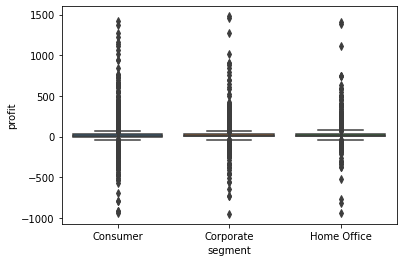

In [ ]:
sns.boxplot(x='segment',y='profit',data=df)


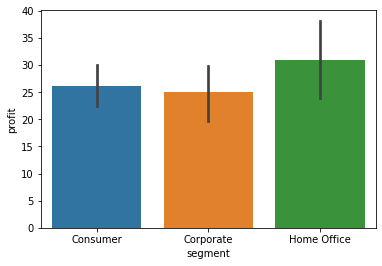

In [ ]:
sns.barplot(x='segment',y='profit',data=df)


In [ ]:
segment={'Home Office':3,'Consumer':2,'Corporate':1}
df['seg_map']=df['segment'].map(segment)

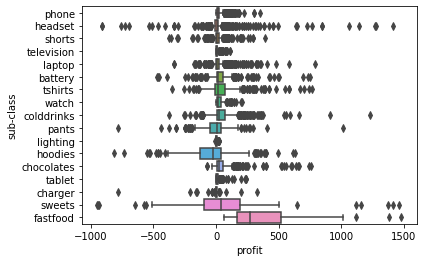

In [ ]:
sns.boxplot(y='sub-class',x='profit',data=df)


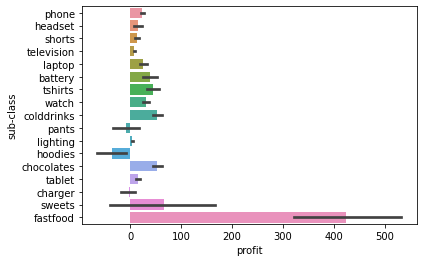

In [ ]:
sns.barplot(y='sub-class',x='profit',data=df)

In [ ]:
# sub={'fastfood':17,'phone':16,'tablet':15,'television':14,'watch':13,'chocolates':12,'sweets':11,'tshirts':10,'battery':9,'colddrinks':8,'laptop':7,'headset':6,'shorts':5,'pants':4,'charger':3,'lighting':2,'hoddies':1}
sub={'fastfood':17,'sweets':16,'chocolates':15,'colddrinks':14,'tshirts':13,'battery':12,'laptop':11,'phone':10,'watch':9,'headset':8,'shorts':7,'tablet':6,'television':5,'pants':4,'charger':3,'lighting':2,'hoddies':1}
df['sub_class_map']=df['sub-class'].map(sub)

In [ ]:
df['delivery type'].value_counts()

Standard Class    4067
Second Class      1286
First Class        964
Same Day           356
Name: delivery type, dtype: int64

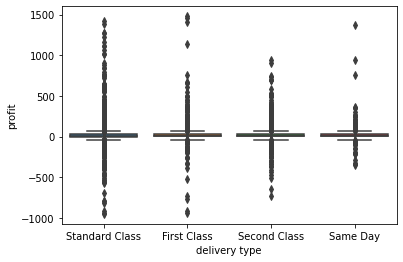

In [ ]:
sns.boxplot(x='delivery type',y='profit',data=df)


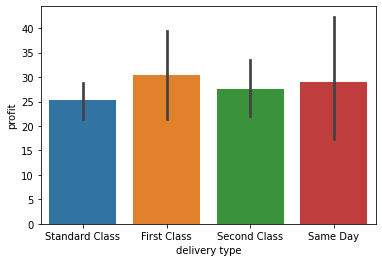

In [ ]:
sns.barplot(x='delivery type',y='profit',data=df)



In [ ]:
delivery={'First Class':4,'Same Day':3,'Second Class':2,'Standard Class':1}
df['del_map']=df['delivery type'].map(delivery)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map
id,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0


In [ ]:
df.groupby('departure state')['profit'].mean()

departure state
Alabama                 117.565516
Arizona                 -13.740675
Arkansas                 74.372790
California               35.164709
Colorado                -17.289336
Connecticut              42.327713
Delaware                 50.963245
District of Columbia    128.065663
Florida                  -3.211860
Georgia                  54.300818
Idaho                    48.285731
Illinois                -17.851031
Indiana                  55.671662
Iowa                     64.853436
Kansas                   31.837728
Kentucky                 73.272445
Louisiana                35.114221
Maine                    56.810775
Maryland                 62.508409
Massachusetts            52.863695
Michigan                 49.772869
Minnesota                74.656660
Mississippi              53.610355
Missouri                 61.533664
Montana                 130.211036
Nebraska                 39.859425
Nevada                   43.724007
New Hampshire            61.314440
New 

In [ ]:
df.groupby('departure state')['profit'].describe().sort_values('mean',ascending=False)['mean'].tolist()

[266.74805,
 130.2110357142857,
 128.0656625,
 124.30173529411765,
 117.56551555555555,
 100.196,
 89.33402207792204,
 77.73306555555554,
 74.65666,
 74.37279024390247,
 73.27244545454545,
 64.85343571428572,
 63.249069387755085,
 62.508408823529436,
 61.53366410256411,
 61.31443999999999,
 59.77745697674421,
 56.81077500000001,
 55.67166206896551,
 54.76552195945939,
 54.45681052631579,
 54.300818032786886,
 53.610354999999984,
 52.863694791666695,
 52.804423544631334,
 50.963245454545444,
 49.772868947368394,
 48.28573076923078,
 43.724006666666675,
 43.36526764705883,
 42.32771250000001,
 39.859425,
 35.16470896191192,
 35.11422142857143,
 31.83772777777778,
 21.981713333333335,
 12.189150000000001,
 -3.2118600790513847,
 -3.3132907975460104,
 -8.652604255319146,
 -9.62410891089109,
 -11.03575309200603,
 -13.740675000000001,
 -17.28933553719008,
 -17.85103095975234,
 -19.539885901639337,
 -22.57610462724936]

In [ ]:
df_dic = df.groupby('departure state')['profit'].mean().reset_index()


In [ ]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-50,0,50,100,300] , labels = [1,2,3,4])

In [ ]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)

In [ ]:
dep_state = df_dic.groupby('departure state')['loc_class'].mean().to_dict()

In [ ]:
df['dep_class'] = df['departure state'].map(dep_state)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class
id,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2


In [ ]:
df.groupby('departure city')['profit'].describe().sort_values('mean',ascending=False)['mean'].tolist()


[642.8857499999999,
 477.4212,
 395.7479,
 356.225,
 277.38315,
 254.84459999999999,
 225.8313,
 218.30646666666667,
 214.9418666666667,
 197.8383875,
 197.80265454545454,
 159.22480000000002,
 158.41171666666665,
 152.495,
 152.41039166666667,
 147.09998333333334,
 146.4036,
 145.2816,
 140.86516,
 134.76435,
 133.08245,
 128.0656625,
 125.8890125,
 121.55194999999999,
 120.23112608695652,
 119.91311111111109,
 118.71013750000002,
 118.34866363636364,
 115.75424615384617,
 115.10452000000001,
 111.0668,
 110.51135,
 110.0528,
 102.97095,
 100.196,
 99.65924444444445,
 97.98893333333335,
 96.9651,
 92.35585555555555,
 92.0835,
 88.32825,
 88.27301904761904,
 86.71202727272727,
 84.44408000000001,
 83.80644,
 82.9507,
 82.81153333333334,
 82.52032222222223,
 82.25283448275862,
 81.583,
 80.736,
 79.48148666666665,
 78.70830000000001,
 77.27137499999999,
 76.17866666666666,
 75.20911666666667,
 74.99786666666667,
 73.16365714285713,
 72.75079999999998,
 70.3548,
 70.10736999999999,
 69.5

In [ ]:
df_dic = df.groupby('departure city')['profit'].mean().reset_index()


In [ ]:
df_dic.profit.min()

-200.61916000000002

In [ ]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [ ]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)
dep_city = df_dic.groupby('departure city')['loc_class'].mean().to_dict()
df['dep_city_class'] = df['departure city'].map(dep_city)


In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class
id,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2


In [ ]:
df_dic = df.groupby('address code')['profit'].mean().reset_index()


In [ ]:
df_dic.profit.min()

-200.61916000000002

In [ ]:
df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [ ]:
df_dic['loc_class'].value_counts()

2    308
3    132
1    122
Name: loc_class, dtype: int64

In [ ]:
df_dic['loc_class'] = df_dic['loc_class'].astype(int)
add_code = df_dic.groupby('address code')['loc_class'].mean().to_dict()
df['address_class'] = df['address code'].map(add_code)


In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
id,,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2,2


In [ ]:
df.corr()

,discount,price,no of items,RID,profit,address code,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
discount,1.000000,-0.046098,0.000617,0.011687,-0.307106,0.067860,-0.000883,0.173545,-0.065329,-0.018681,-0.032142,-0.004485,-0.633804,-0.538099,-0.570047
price,-0.046098,1.000000,0.246227,-0.008135,0.527843,-0.010998,0.234367,-0.025290,-0.004221,0.001573,0.266905,0.006069,0.092791,0.107536,0.119714
no of items,0.000617,0.246227,1.000000,-0.003631,0.122635,0.004494,0.905382,0.014305,-0.023504,-0.004722,-0.013741,-0.022025,0.007853,0.013052,0.012659
RID,0.011687,-0.008135,-0.003631,1.000000,0.002745,0.009695,-0.011543,0.017236,-0.005508,-0.026887,-0.002920,-0.021308,-0.008074,0.003529,0.008032
profit,-0.307106,0.527843,0.122635,0.002745,1.000000,-0.049335,0.128429,-0.042680,0.136769,0.015166,0.189190,0.016052,0.284077,0.285107,0.311044
address code,0.067860,-0.010998,0.004494,0.009695,-0.049335,1.000000,0.009198,0.341801,-0.001524,0.003803,0.019124,-0.014260,-0.268545,-0.190403,-0.145060
item_map,-0.000883,0.234367,0.905382,-0.011543,0.128429,0.009198,1.000000,0.022561,-0.018081,-0.002817,-0.014674,-0.012240,0.009105,0.018249,0.016170
loc_map,0.173545,-0.025290,0.014305,0.017236,-0.042680,0.341801,0.022561,1.000000,0.005750,0.002384,0.020291,-0.056808,-0.270086,-0.221328,-0.108755
class_map,-0.065329,-0.004221,-0.023504,-0.005508,0.136769,-0.001524,-0.018081,0.005750,1.000000,0.014053,0.514819,0.010675,-0.008115,-0.014675,-0.009068
seg_map,-0.018681,0.001573,-0.004722,-0.026887,0.015166,0.003803,-0.002817,0.002384,0.014053,1.000000,-0.005137,-0.002167,0.030362,-0.000679,0.007755


In [ ]:
df.drop('RID',axis=1 ,inplace=True)

In [ ]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,delivery date,address code,departure state,placement date,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class
id,,,,,,,,,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,2018-01-01,77095,Texas,2018-01-01,2,4,2,2,10.0,1.0,1,1,1
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,2018-01-01,48185,Michigan,2018-01-01,7,4,2,2,8.0,1.0,2,2,2
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,2018-01-01,48185,Michigan,2018-01-01,3,4,1,2,7.0,1.0,2,2,2
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,2018-01-01,48185,Michigan,2018-01-01,3,4,2,2,5.0,1.0,2,2,2
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,2018-01-01,48185,Michigan,2018-01-01,2,4,2,2,11.0,1.0,2,2,2


In [ ]:
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['placement date'] = pd.to_datetime(df['placement date'])
df['duration'] = (df['delivery date'] - df['placement date']).dt.days

In [ ]:
df['delivery_month']=df['delivery date'].dt.month
df['delivery_week']=df['delivery date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df['placement_month']=df['placement date'].dt.month
df['placement_week']=df['placement date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


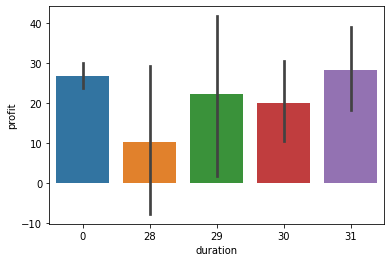

In [ ]:
sns.barplot(x='duration',y='profit',data=df)

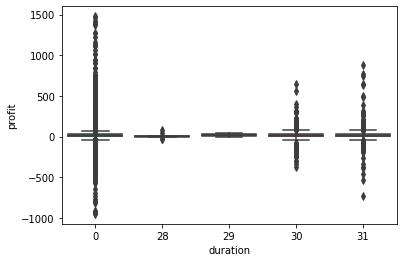

In [ ]:
sns.boxplot(x='duration',y='profit',data=df)


In [ ]:
# duration={29:5,28:4,30:3,31:2,0:1}
duration={31:5,0:4,29:3,30:2,28:1}
df['duration_map']=df['duration'].map(duration)

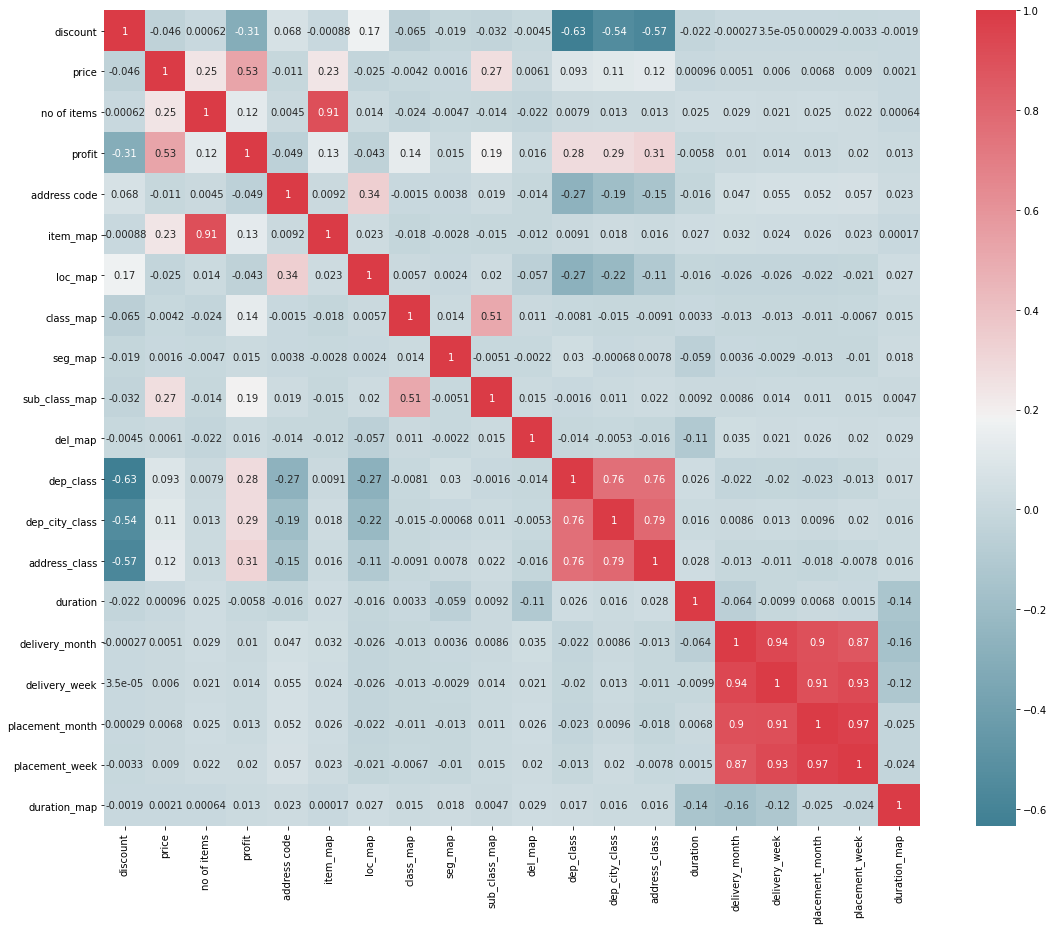

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [ ]:
df.drop(['departure city','location','class','segment','sub-class','delivery type','delivery date','address code','departure state','placement date'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

discount             0
price                0
no of items          0
profit               0
item_map             0
loc_map              0
class_map            0
seg_map              0
sub_class_map      215
del_map              1
dep_class            0
dep_city_class       0
address_class        0
duration             0
delivery_month       0
delivery_week        0
placement_month      0
placement_week       0
duration_map         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 1 to 6700
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discount         6674 non-null   float64
 1   price            6674 non-null   float64
 2   no of items      6674 non-null   int64  
 3   profit           6674 non-null   float64
 4   item_map         6674 non-null   int64  
 5   loc_map          6674 non-null   int64  
 6   class_map        6674 non-null   int64  
 7   seg_map          6674 non-null   int64  
 8   sub_class_map    6459 non-null   float64
 9   del_map          6673 non-null   float64
 10  dep_class        6674 non-null   int64  
 11  dep_city_class   6674 non-null   int64  
 12  address_class    6674 non-null   int64  
 13  duration         6674 non-null   int64  
 14  delivery_month   6674 non-null   int64  
 15  delivery_week    6674 non-null   int64  
 16  placement_month  6674 non-null   int64  
 17  placement_week

In [ ]:
# Funtion to clean the dateset for Nan Values and infinite numbers and mismatch in datatype values

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
# Calling the Cleaning Function
clean_dataset(df)

,discount,price,no of items,profit,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class,duration,delivery_month,delivery_week,placement_month,placement_week,duration_map
id,,,,,,,,,,,,,,,,,,,
1,0.2,16.448,2.0,5.5512,2.0,4.0,2.0,2.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0
2,0.0,29.700,5.0,13.3650,7.0,4.0,2.0,2.0,8.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0
3,0.0,14.730,3.0,4.8609,3.0,4.0,1.0,2.0,7.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0
4,0.0,43.920,3.0,12.7368,3.0,4.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0
5,0.0,66.580,2.0,15.9792,2.0,4.0,2.0,2.0,11.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,0.0,542.940,3.0,152.0232,3.0,1.0,2.0,2.0,12.0,1.0,4.0,3.0,3.0,0.0,1.0,53.0,1.0,53.0,4.0
6697,0.2,276.784,2.0,89.9548,2.0,2.0,2.0,1.0,8.0,1.0,2.0,2.0,2.0,0.0,1.0,53.0,1.0,53.0,4.0
6698,0.0,2.040,1.0,0.9588,1.0,1.0,2.0,2.0,9.0,1.0,4.0,3.0,3.0,0.0,1.0,53.0,1.0,53.0,4.0


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
# Separating the target Column from train Set
Y_train = df[['profit']]

In [ ]:
# Dropping the Target column in train set

df.drop('profit', axis = 1, inplace = True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
# Function for feature Selection Based on Corelation
def cor(dataset,thres):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [ ]:
# Setting Threshold value for feature Selection

corr_features = cor(df, 0.8)
len(corr_features)

4

In [ ]:
corr_features

{'delivery_week', 'item_map', 'placement_month', 'placement_week'}

In [ ]:
df.drop(['delivery_week', 'placement_month', 'placement_week'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.05, random_state=42)


In [ ]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [ ]:
X_train.shape

(6135, 15)

In [ ]:
X_test.shape

(323, 15)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = lr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = lr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

7457.501471309513 
 86.35682643143802 
 0.44074344758112305 
 0.44074344758112305 



In [ ]:
predict = lr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = lr.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

10503.595470201255 
 102.48705025612385 
 -0.1696658778452349 
 -0.1696658778452349 



In [ ]:
dtr = DecisionTreeRegressor(max_depth = 40, max_leaf_nodes = 20, min_samples_leaf = 20, min_samples_split = 10)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=40,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:

predict = dtr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = dtr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

3855.419561503087 
 62.09202494284662 
 0.7108725140196455 
 0.7108725140196455 



In [ ]:
predict = dtr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = dtr.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

9888.831549512359 
 99.44260429771718 
 -0.10120661710921763 
 -0.10120661710921763 



In [ ]:
rf = RandomForestRegressor(n_estimators= 20, random_state= 10)
rf.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
predict = rf.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = rf.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

371.2285304351696 
 19.267291725490885 
 0.9721606507367885 
 0.9721606507367885 



In [ ]:
predict = rf.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = rf.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

3243.8987451755556 
 56.95523457221079 
 0.6387639181096413 
 0.6387639181096413 



In [ ]:
df.head(1)

,discount,price,no of items,item_map,loc_map,class_map,seg_map,sub_class_map,del_map,dep_class,dep_city_class,address_class,duration,delivery_month,duration_map
0,0.2,16.448,2,2,4,2,2,10.0,1.0,1,1,1,0,1,4


In [ ]:
# Artificial Neural Network
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, input_dim=15, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
#nn.add(tf.keras.layers.Dense(units=8, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,  activation='sigmoid'))

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
#earlystop = EarlyStopping(monitor= "loss")
ann.fit(X_train, y_train, batch_size = 16, epochs = 20)
#, callbacks = earlystop)


Epoch 1/20
384/384 [==============================] - 1s 1ms/step - loss: 14535.5706 - mean_squared_error: 14535.5706
Epoch 2/20
384/384 [==============================] - 1s 1ms/step - loss: 12694.1468 - mean_squared_error: 12694.1468
Epoch 3/20
384/384 [==============================] - 1s 1ms/step - loss: 14304.0295 - mean_squared_error: 14304.0295
Epoch 4/20
384/384 [==============================] - 1s 1ms/step - loss: 12563.0353 - mean_squared_error: 12563.0353
Epoch 5/20
384/384 [==============================] - 1s 1ms/step - loss: 13539.8372 - mean_squared_error: 13539.8372
Epoch 6/20
384/384 [==============================] - 1s 1ms/step - loss: 13728.8758 - mean_squared_error: 13728.8758
Epoch 7/20
384/384 [==============================] - 1s 1ms/step - loss: 13185.5188 - mean_squared_error: 13185.5188
Epoch 8/20
384/384 [==============================] - 1s 1ms/step - loss: 14604.8939 - mean_squared_error: 14604.8939
Epoch 9/20
384/384 [==============================] - 1s

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predict = ann.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

14146.01372661765 
 118.93701579667135 
 -0.060844694118324716 



In [ ]:
predict = ann.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

9150.096724372406 
 95.6561379336026 
 -0.01894212775473436 



###TEST DATA

In [ ]:
test=pd.read_csv("/content/test.csv")

In [ ]:
test.head()

In [ ]:
test.isna().sum()

In [ ]:
test.drop('RID',axis=1,inplace=True)

In [ ]:

test['item_map']=test['no of items'].map(items)

In [ ]:

test['loc_map']=test['location'].map(loc)

In [ ]:

test['class_map']=test['class'].map(class_map)

In [ ]:

test['seg_map']=test['segment'].map(segment)

In [ ]:

test['sub_class_map']=test['sub-class'].map(sub)

In [ ]:

test['del_map']=test['delivery type'].map(delivery)

In [ ]:
# df_dic = test.groupby('departure state')['profit'].mean().reset_index()


In [ ]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-50,0,50,100,300] , labels = [1,2,3,4])

In [ ]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)

In [ ]:
# DIC = df_dic.groupby('departure state')['loc_class'].mean().to_dict()

In [ ]:
test['dep_class'] = test['departure state'].map(dep_state)

In [ ]:
# df_dic = df.groupby('departure city')['profit'].mean().reset_index()


In [ ]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])


In [ ]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)
# DIC = df_dic.groupby('departure city')['loc_class'].mean().to_dict()
test['dep_city_class'] = test['departure city'].map(dep_city)


In [ ]:
# df_dic = df.groupby('address code')['profit'].mean().reset_index()


In [ ]:
# df_dic['loc_class'] = pd.cut(x = df_dic['profit'], bins = [-210,0,50,650] , labels = [1,2,3])
# 

In [ ]:
# df_dic['loc_class'] = df_dic['loc_class'].astype(int)
# DIC = df_dic.groupby('address code')['loc_class'].mean().to_dict()
test['address_class'] = test['address code'].map(add_code)


In [ ]:
test['delivery date'] = pd.to_datetime(test['delivery date'])
test['placement date'] = pd.to_datetime(test['placement date'])
test['duration'] = (test['delivery date'] - test['placement date']).dt.days

In [ ]:
test['delivery_month']=test['delivery date'].dt.month
test['delivery_week']=test['delivery date'].dt.week
test['placement_month']=test['placement date'].dt.month
test['placement_week']=test['placement date'].dt.week


In [ ]:
# duration={31:5,0:4,29:3,30:2,28:1}
test['duration_map']=test['duration'].map(duration)

In [ ]:
test.set_index('id',inplace=True)

In [ ]:
test.columns

In [ ]:
df.columns

In [ ]:
test.drop(['location','class','segment','sub-class','delivery type','delivery date','address code','departure state','placement date','delivery_week', 'placement_month', 'placement_week'], axis=1, inplace=True)